# Experiment 2: Recognize Optical Characters using ANN

**Objective:**  
To develop an Artificial Neural Network (ANN) that can recognize handwritten digits (0–9).  

**Dataset Used:**  
- The **Digits dataset** from scikit-learn.  
- Contains 1797 samples of 8×8 grayscale images (total 64 features).  
- Target labels range from 0 to 9 (multi-class classification).  

**Why ANN?**  
- ANN can learn complex, non-linear mappings between image pixels (features) and digit labels.  
- Suitable for recognition tasks like OCR (Optical Character Recognition).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model
from IPython.display import Image


### Step: Load Dataset
We load the **Digits dataset** and visualize some samples.


Dataset Shape: (1797, 64)
Labels Shape: (1797,)


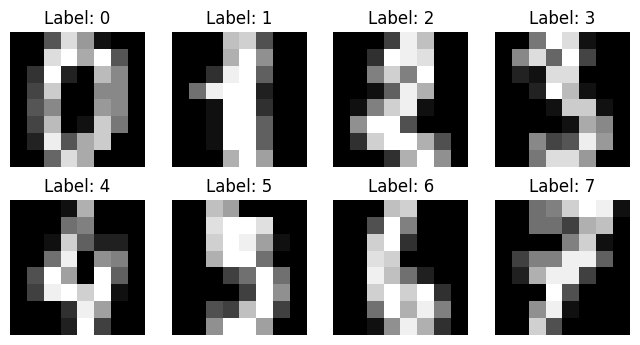

In [2]:
digits = load_digits()
X, y = digits.data, digits.target

print("Dataset Shape:", X.shape)
print("Labels Shape:", y.shape)

# Show some digit images
plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.show()


### Step: Data Preprocessing
1. Flatten 8x8 images into 64 features (already done in dataset).  
2. Scale features using `StandardScaler`.  
3. Convert labels to **one-hot encoding** using `LabelBinarizer` (since this is multi-class classification).


In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

lb = LabelBinarizer()
y = lb.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step: Build ANN
- Input layer: 64 neurons (for 64 pixel features).  
- Hidden Layer 1: 128 neurons, ReLU activation.  
- Hidden Layer 2: 64 neurons, ReLU activation.  
- Output Layer: 10 neurons, Softmax activation (for multi-class classification).


In [4]:
model = Sequential()
model.add(Dense(128, input_dim=64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step: Train ANN
We train the model for 50 epochs with batch size 16.


In [5]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5003 - loss: 1.7158 - val_accuracy: 0.9250 - val_loss: 0.3295
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9560 - loss: 0.2447 - val_accuracy: 0.9667 - val_loss: 0.1532
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9771 - loss: 0.1105 - val_accuracy: 0.9778 - val_loss: 0.1068
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9892 - loss: 0.0593 - val_accuracy: 0.9806 - val_loss: 0.0899
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9948 - loss: 0.0397 - val_accuracy: 0.9778 - val_loss: 0.0806
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9987 - loss: 0.0209 - val_accuracy: 0.9750 - val_loss: 0.0763
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9996 - loss: 0.0170 - val_accuracy: 0.9806 - val_loss: 0.0788
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0128 - val_accuracy: 0.9750 - val_l

### Step: Evaluate Model
Check performance on test data.


In [6]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {accuracy*100:.2f}%")



✅ Test Accuracy: 97.78%


### Step: Visualize ANN using `plot_model`


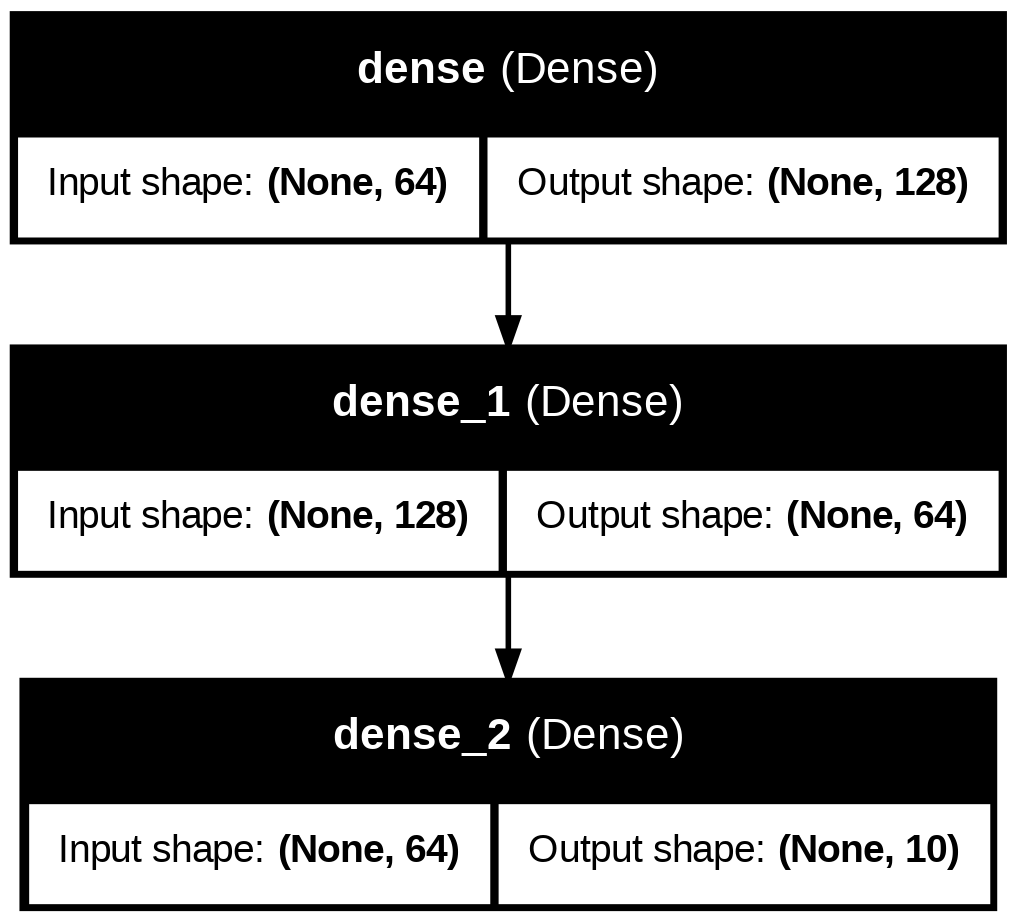

In [7]:
plot_model(model, to_file='ocr_model.png', show_shapes=True, show_layer_names=True)
Image(filename='ocr_model.png')


### Step: Plot Accuracy & Loss
Visualize training process.


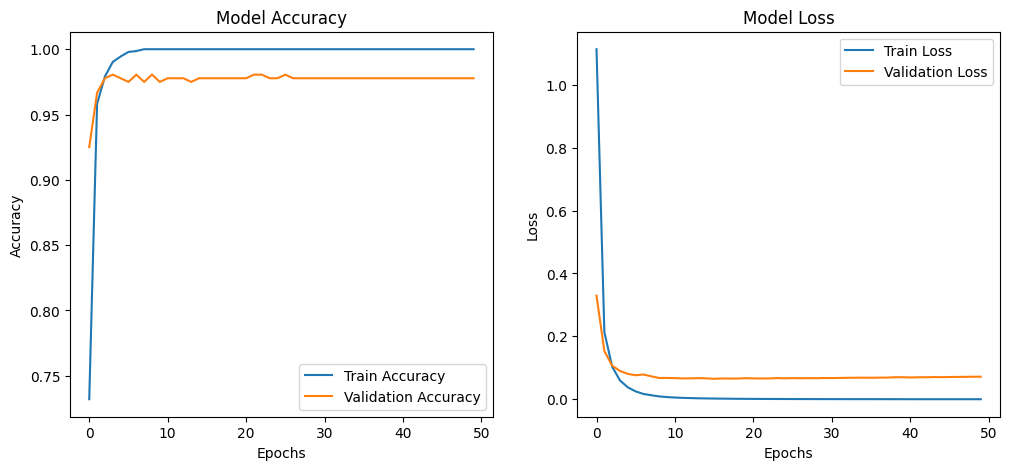

In [8]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


### Step: Test Prediction
We display a sample digit and its predicted label.


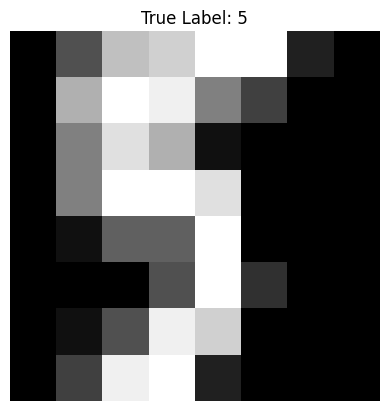

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
✅ Predicted Label: 5


In [9]:
sample_index = 15
plt.imshow(digits.images[sample_index], cmap='gray')
plt.title(f"True Label: {digits.target[sample_index]}")
plt.axis('off')
plt.show()

prediction = model.predict(X[sample_index].reshape(1, -1))
predicted_label = np.argmax(prediction)
print(f"✅ Predicted Label: {predicted_label}")
